In [124]:
import pandas as pd
import numpy as np

bull_df = pd.read_excel("Bulls.xlsx", header = 0)
stormer_df = pd.read_excel("Stormers.xlsx", header = 0)

In [125]:
bull_df

,Year,Place,Played,Win,Draw,Loss,PF,PA,Diff,BP,Points,Playoffs,South African conference
0,2011,7th,16,10,0,6,416,370,46,6,54,NaN,3rd
1,2012,5th,16,10,0,6,472,369,103,11,59,Lost qualifiers 28–13 to the Crusaders.,2nd
2,2013,2nd,16,12,0,4,448,330,118,7,63,Lost semi final 23–26 to the Brumbies.,1st
3,2014,9th,16,7,1,8,365,335,30,8,38,NaN,2nd
4,2015,9th,16,7,0,9,397,388,9,10,38,NaN,3rd
5,2016,7th,15,9,1,5,339,459,-120,0,20,NaN,7th
6,2017,7th,15,4,0,11,339,459,-120,0,20,NaN,7th
7,2018,12th,16,6,0,10,441,502,-61,2,29,NaN,5th
8,2019,5th,16,8,2,6,410,369,41,3,41,Lost Quarterfinals 35–28 to the Hurricanes.,2nd
9,2020,12th,6,1,0,5,115,152,-37,1,6,Season cancelled due to Covid-19,4th


In [126]:
stormer_df

,Season,Pos,Pld,W,D,L,PF,PA,+/–,BP,Pts,Notes
0,1996,11th,11,3,1,7,251,353,−102,1,15,As Western Province
1,1998,9th,11,3,0,8,248,364,−116,6,18,NaN
2,1999,2nd,11,8,0,3,290,244,46,4,36,Lost semi-final to Highlanders
3,2000,5th,11,6,1,4,298,276,22,5,31,NaN
4,2001,7th,11,5,0,6,278,285,−7,6,26,NaN
5,2002,7th,11,5,0,6,310,314,−4,7,27,NaN
6,2003,9th,11,5,0,6,255,354,−99,3,23,NaN
7,2004,3rd,11,7,0,4,286,260,26,5,33,Lost semi-final to Crusaders
8,2005,9th,11,3,1,7,215,320,−105,4,18,NaN
9,2006,11th,13,4,1,8,263,334,−71,5,23,NaN


In [127]:
stormer=pd.DataFrame()
stormer[['Year','Wins', 'Losses']]=stormer_df[['Season','W', 'L']].copy()
stormer['Year']=stormer['Year'].astype(int)
stormer['Wins']=stormer['Wins'].astype(int)
stormer['Losses']=stormer['Losses'].astype(int)


In [128]:
stormer = (stormer[stormer["Year"] >= 2011])


In [129]:
stormer['Stormers_Win%']=stormer['Wins']/(stormer['Wins']+stormer['Losses'])

In [130]:
stormer['W-L'] = stormer["Wins"] - stormer["Losses"]

In [153]:
results = np.where(stormer['W-L']<0, 0, stormer['W-L'])
results

array([ 8, 12,  2,  0,  5,  6])

In [155]:
stormer['W-L'] = results

In [156]:
stormer

,Year,Wins,Losses,Stormers_Win%,W-L
14,2011,12,4,0.750000,8
15,2012,14,2,0.875000,12
16,2013,9,7,0.562500,2
17,2014,7,9,0.437500,0
18,2015,10,5,0.666667,5
19,2016,10,4,0.714286,6


In [131]:
bull = pd.DataFrame()
bull[['Year','Wins', 'Losses']]=bull_df[['Year','Win', 'Loss']].copy()
bull['Year']=bull['Year'].astype(int)
bull['Wins']=bull['Wins'].astype(int)
bull['Losses']=bull['Losses'].astype(int)

In [132]:
bull = bull[(bull["Year"] >= 2011) & (bull["Year"] < 2017)]

In [133]:
bull['Bulls_Win%']=bull['Wins']/(bull['Wins']+bull['Losses'])

In [148]:
bull['W-L'] = bull["Wins"] - bull["Losses"]

In [150]:
resultb = np.where(bull['W-L']<0, 0, bull['W-L'])
resultb

array([4, 4, 8, 0, 0, 4])

In [151]:
bull['W-L'] = resultb

In [152]:
bull

,Year,Wins,Losses,Bulls_Win%,W-L
0,2011,10,6,0.625000,4
1,2012,10,6,0.625000,4
2,2013,12,4,0.750000,8
3,2014,7,8,0.466667,0
4,2015,7,9,0.437500,0
5,2016,9,5,0.642857,4


In [136]:
stormer

,Year,Wins,Losses,Stormers_Win%,W-L
14,2011,12,4,0.750000,8
15,2012,14,2,0.875000,12
16,2013,9,7,0.562500,2
17,2014,7,9,0.437500,-2
18,2015,10,5,0.666667,5
19,2016,10,4,0.714286,6


In [140]:
b_s=pd.merge(stormer.drop(['Wins','Losses','W-L'], axis=1),bull.drop(['Wins','Losses', 'W-L'], axis=1),on='Year')


In [141]:
b_s

,Year,Stormers_Win%,Bulls_Win%
0,2011,0.750000,0.625000
1,2012,0.875000,0.625000
2,2013,0.562500,0.750000
3,2014,0.437500,0.466667
4,2015,0.666667,0.437500
5,2016,0.714286,0.642857


<IPython.core.display.Javascript object>


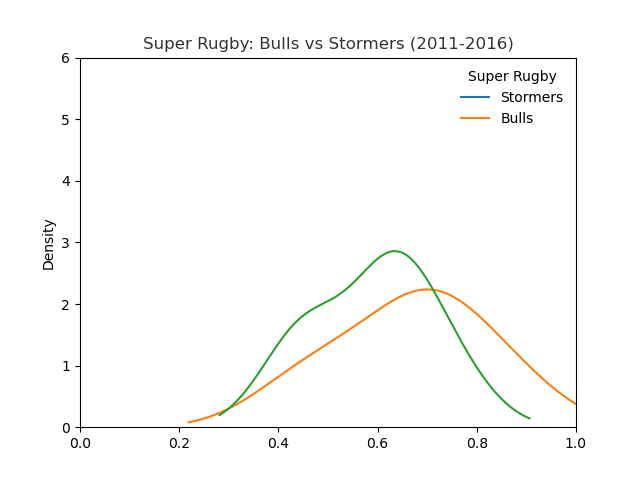

In [157]:
import matplotlib.pyplot as plt

%matplotlib notebook
# Draw KDE
kde=b_s.plot.kde()
kde.axis([0,1,0,6])
kde.set_title('Super Rugby: Bulls vs Stormers (2011-2016)',alpha=0.8)
kde.legend(['Stormers', 'Bulls'],loc = 'best',frameon=False, title='Super Rugby', fontsize=10)


<IPython.core.display.Javascript object>


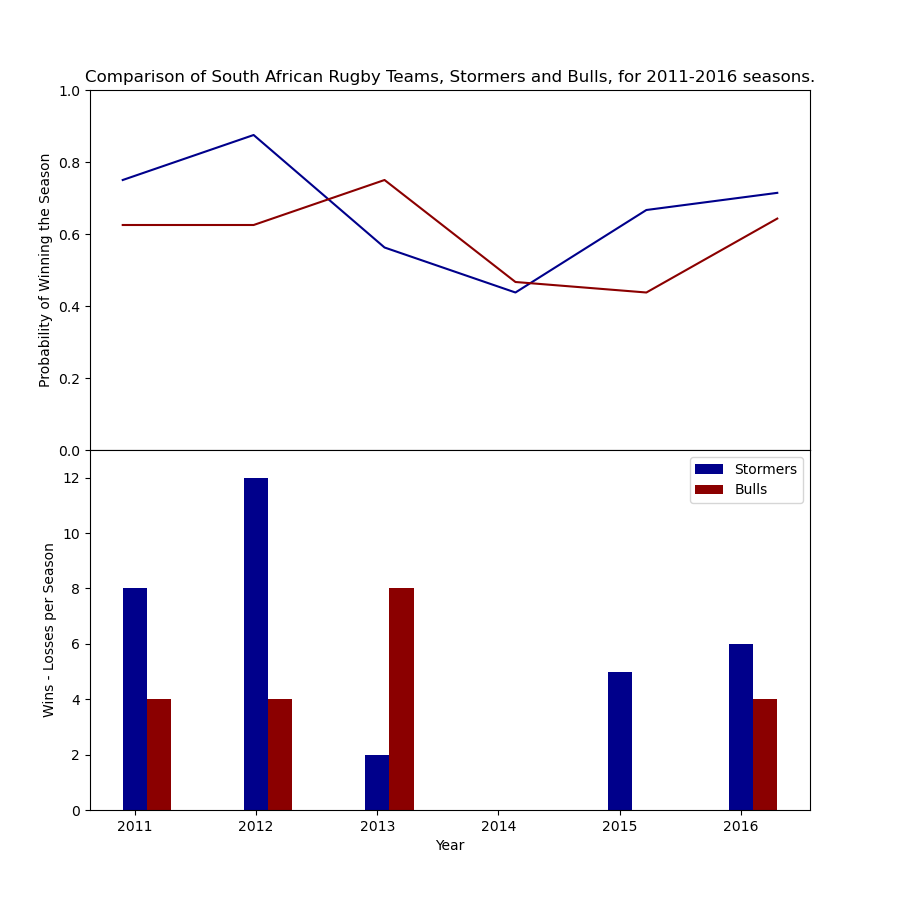

In [198]:
fig = plt.figure(figsize = (9,9))
ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4],
                   ylabel = "Probability of Winning the Season", ylim=(0.0, 1.0),
                  title = "Comparison of South African Rugby Teams, Stormers and Bulls, for 2011-2016 seasons.")
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4], 
                   xlabel = "Year", ylabel = "Wins - Losses per Season",ylim=(0, 13))

years = ("2011", "2012", "2013","2014","2015","2016")
xi = list(range(len(years)))
# Probability Plot
ax1.plot(b_s["Stormers_Win%"], color = 'darkblue', label = 'Stormers')
ax1.plot(b_s["Bulls_Win%"], color = 'darkred', label = 'Bulls')
# Win - Loss Plot
n=len(b_s)
r = np.arange(n)
width = 0.2
r1 = [i + width for i in r ] 
r2 = [i + width for i in r1]
r3 = [i + width for i in r2]
# Stormer
ax2.bar(r, stormer["W-L"], color = 'darkblue', label = "Stormers",width = width)
# Bulls
ax2.bar(r1, bull["W-L"], color = "darkred", label = "Bulls" ,width = width)
plt.xticks(xi, years)
#ax2.legend(loc = 'best')
plt.legend(loc = 'best')
#plt.title("Comparison of South African Rugby Teams, Stormers and Bulls for 2011-2016 seasons.")

